# Flower Classification Project 🌸

## 1. Importing Required Libraries

In [ ]:
from random import randint

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
train_dir = 'C:/Users/Lenovo/Desktop/Machine Learning/ClassificationAssignment2/Machine_learning/Assignment 2 - Image Classification using deep learning/Flower Classification/Training Data'
test_dir = 'C:/Users/Lenovo/Desktop/Machine Learning/ClassificationAssignment2/Machine_learning/Assignment 2 - Image Classification using deep learning/Flower Classification/Testing Data'
lookup = ['Daisy', 'Lavender', 'Lily', 'Rose', 'Sunflower']


## 2. Data Preprocessing

Images are rescaled to normalize pixel values before training.

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)

test_image_generator = ImageDataGenerator(rescale=1./255)

A batch size is defined to determine the number of images processed at a time.

In [13]:
batch_size = 128

This section loads images from the training dataset directory and converts them into batches.

In [17]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(32, 32))

Found 5000 images belonging to 5 classes.


This section loads images from the test dataset directory and converts them into batches.

In [18]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=test_dir,
                                                         shuffle=True,
                                                         target_size=(32, 32))

Found 958 images belonging to 5 classes.


This retrieves a batch of images and their corresponding labels from `train_data_gen` and prints their shapes to verify the input format before training.


In [36]:
sample_batch = next(train_data_gen)

sample_batch[0].shape
sample_batch[1].shape  # This will print the shape of the labels


(128, 5)

## 3. Building the CNN Model

A Convolutional Neural Network (CNN) model is created using Keras layers.

In [38]:
conv_model = tf.keras.models.Sequential([

    layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')

])

The model is compiled using the Adam optimizer and categorical cross-entropy loss function.

In [39]:
conv_model.compile(optimizer='adam',
                   loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
keras.utils.plot_model(conv_model, 'model_image_classification_shapes.png', show_shapes=True)

## 4. Training the Model  


Fits the CNN model using the training data generator for 5 epochs, with validation on test data.

In [41]:
training_hist = conv_model.fit(
    train_data_gen,  # Use the training data generator
    epochs=5,
    steps_per_epoch=train_data_gen.samples // batch_size,  # Number of steps per epoch (total samples / batch size)
    validation_data=test_data_gen,  # Use the testing data generator
    validation_steps=test_data_gen.samples // batch_size  # Number of validation steps
)

Epoch 1/5


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3791 - loss: 1.3979

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.3819 - loss: 1.3933 - val_accuracy: 0.5223 - val_loss: 1.1845
Epoch 2/5
 1/39 ━━━━━━━━━━━━━━━━━━━━ 13s 353ms/step - accuracy: 0.5781 - loss: 0.9560

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5781 - loss: 0.9560 - val_accuracy: 0.5536 - val_loss: 1.1176
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 401ms/step - accuracy: 0.6472 - loss: 0.9004 - val_accuracy: 0.5893 - val_loss: 0.8891
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6797 - loss: 0.7825 - val_accuracy: 0.5938 - val_loss: 0.8766
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 414ms/step - accuracy: 0.7042 - loss: 0.7747 - val_accuracy: 0.6027 - val_loss: 0.9554


### Plotting Training Performance  


Plots training and validation accuracy and loss over epochs to visualize model performance.

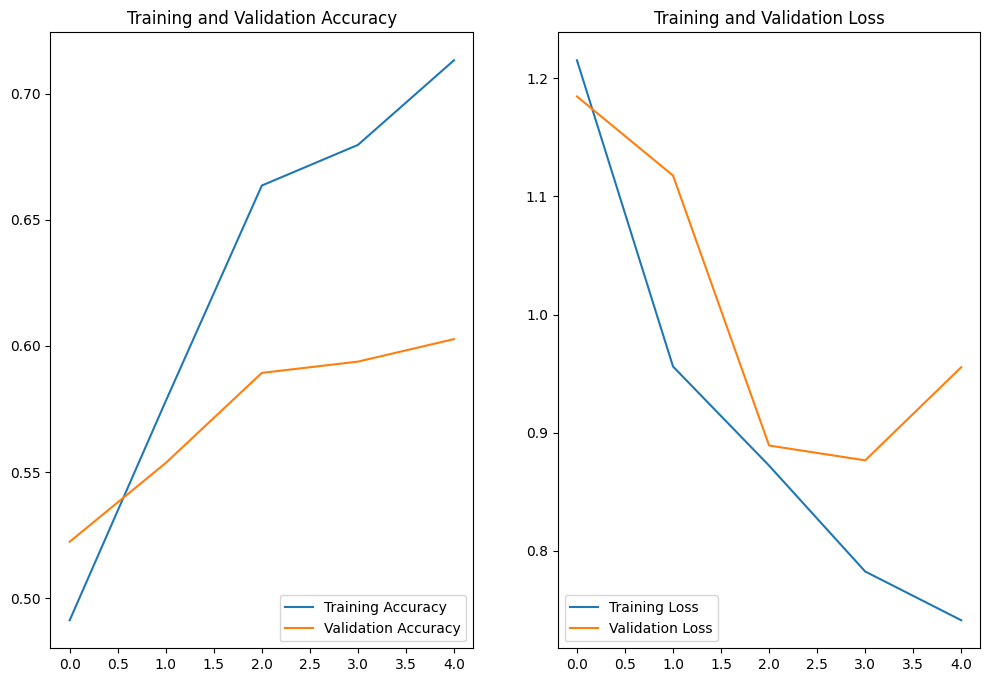

In [42]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='lower left')

plt.title('Training and Validation Loss')
plt.show()

In [43]:
from tensorflow.keras.preprocessing import image


## 5. Testing the Model on a Sample Image  


Retrieves an image from the test data generator, displays it, and predicts its class using the trained model.








In [81]:
def perform_test(model, test_data_gen):
    # Get a batch of data from the test generator
    test_batch = next(test_data_gen)  # Get the next batch from the generator
    test_img = test_batch[0][0]  # Get the first image in the batch
    test_label = test_batch[1][0]  # Get the first label in the batch
    test_label_index = np.argmax(test_label)  # Get the index of the '1' in the one-hot vector
# Display the image
    plt.imshow(test_img)
    plt.show()

    test_img1 = np.expand_dims(test_img, axis=0)
    result = model.predict(test_img1)

    print('Actual label: ', lookup[int(test_label_index)])
    print('Predicted label: ', lookup[np.argmax(result)])




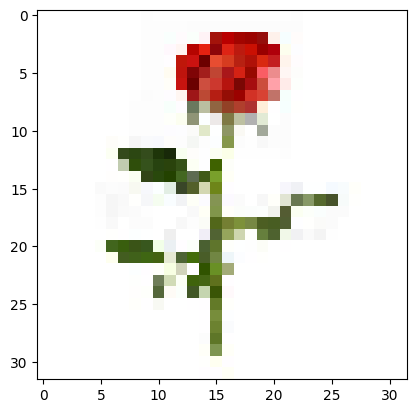

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Actual label:  Rose
Predicted label:  Rose


In [82]:
perform_test(conv_model, test_data_gen)


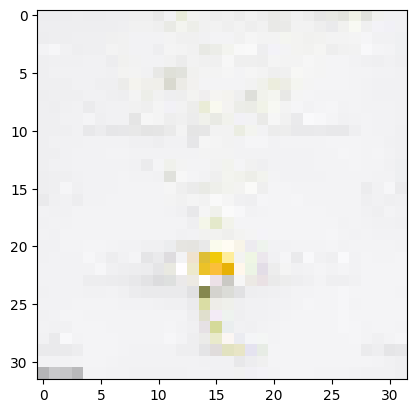

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Actual label:  Daisy
Predicted label:  Daisy


In [83]:
perform_test(conv_model, test_data_gen)


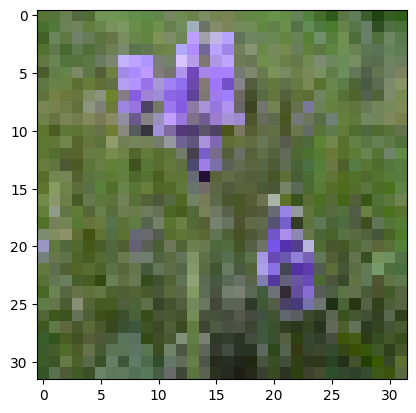

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Actual label:  Lavender
Predicted label:  Lavender


In [84]:
perform_test(conv_model, test_data_gen)


## 6. Advanced Data Augmentation  


Enhances model generalization by applying rescaling and horizontal flipping. Displays a sample image to verify augmentation.

Found 5000 images belonging to 5 classes.


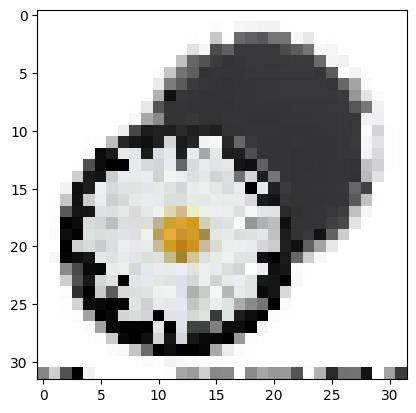

In [85]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))


plt.imshow(train_data_gen[0][0][0])

Improves model generalization by rescaling images and applying random rotations up to 60°. Displays a sample image to verify augmentation.


Found 5000 images belonging to 5 classes.


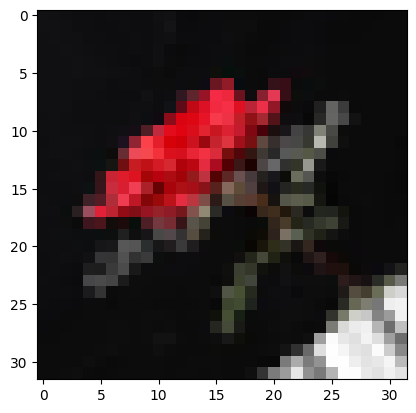

In [86]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=60)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))

plt.imshow(train_data_gen[0][0][0])

Enhances model robustness by rescaling images and applying random zooming up to 50%. Displays a sample image to verify augmentation.

Found 5000 images belonging to 5 classes.


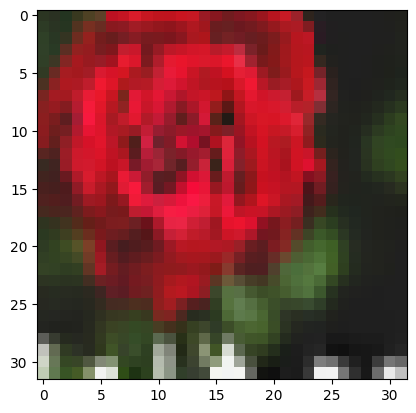

In [87]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(32, 32))

plt.imshow(train_data_gen[0][0][0])

Applies multiple transformations—rescaling, rotation (30°), shifting (5%), horizontal flipping, and zooming (30%)—to improve model generalization. Displays a sample image to verify augmentation.

Found 5000 images belonging to 5 classes.


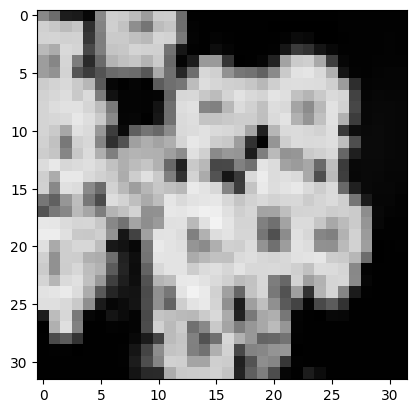

In [88]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=.05,
    height_shift_range=.05,
    horizontal_flip=True,
    zoom_range=0.3
)

train_data_gen_aug = image_gen.flow_from_directory(batch_size=batch_size,
                                                   directory=train_dir,
                                                   shuffle=True,
                                                   target_size=(32, 32))

plt.imshow(train_data_gen_aug[0][0][0])

## 7. CNN Model with Dropout  


Defines a Convolutional Neural Network (CNN) with dropout layers to reduce overfitting. The model includes convolutional layers, pooling layers, fully connected layers, and a final softmax output for classification.


In [89]:
conv_model_with_dropout = tf.keras.models.Sequential([

    layers.Conv2D(16, (3, 3), padding='same', activation='relu',
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),

    layers.Dropout(0.25),

    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')

])

In [90]:
conv_model_with_dropout.compile(optimizer='adam',
                                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                                metrics=['accuracy'])

Trains the model for 5 epochs using the training data, while validating performance on the test set to monitor overfitting.

In [92]:
training_hist = conv_model_with_dropout.fit(train_data_gen,
                                            epochs=5,
                                            steps_per_epoch=len(train_data_gen) // batch_size,
                                            validation_data=test_data_gen,
                                            validation_steps=len(test_data_gen) // batch_size)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 794ms/step - accuracy: 0.2722 - loss: 1.5774 - val_accuracy: 0.4092 - val_loss: 1.3144
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 615ms/step - accuracy: 0.5337 - loss: 1.1427 - val_accuracy: 0.5376 - val_loss: 0.9823
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 660ms/step - accuracy: 0.6051 - loss: 0.9615 - val_accuracy: 0.5595 - val_loss: 0.9592
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 673ms/step - accuracy: 0.6727 - loss: 0.8474 - val_accuracy: 0.5950 - val_loss: 0.8783
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 658ms/step - accuracy: 0.6668 - loss: 0.8376 - val_accuracy: 0.6232 - val_loss: 0.8264


### Evaluating Training Performance  


Plots accuracy and loss curves for both training and validation data over 5 epochs to assess model performance and detect overfitting.


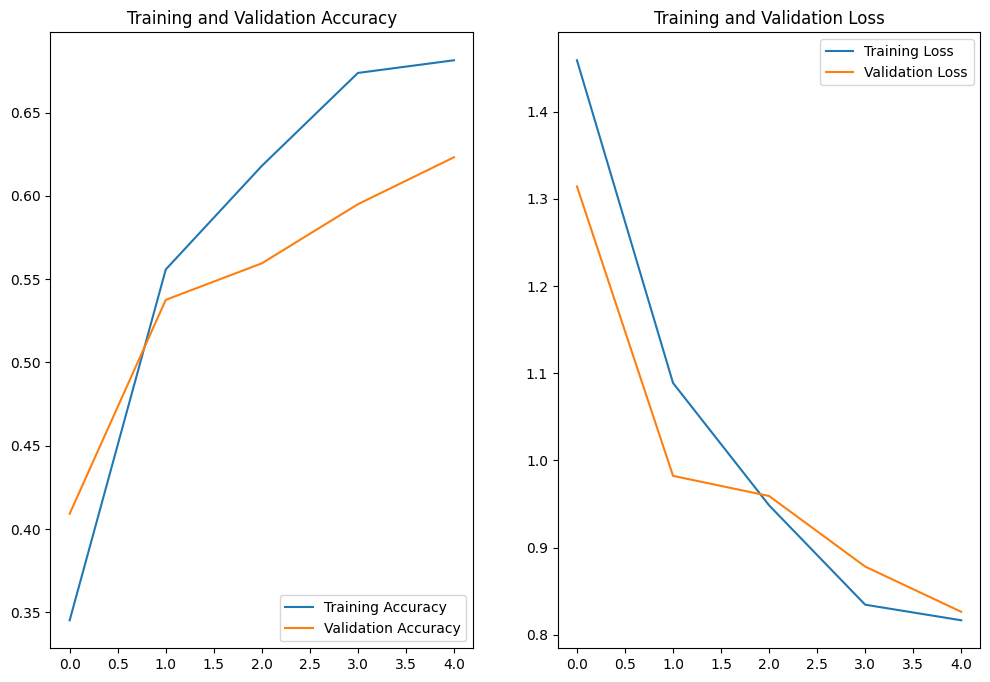

In [93]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss=training_hist.history['loss']
val_loss=training_hist.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

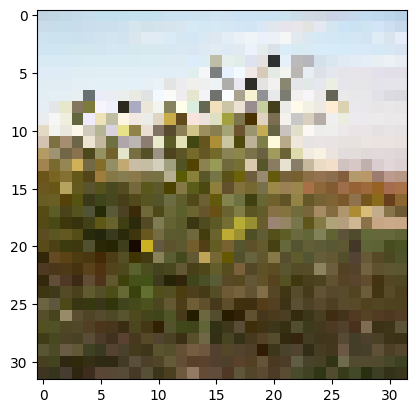

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Actual label:  Sunflower
Predicted label:  Sunflower


In [94]:
perform_test(conv_model_with_dropout,test_data_gen)

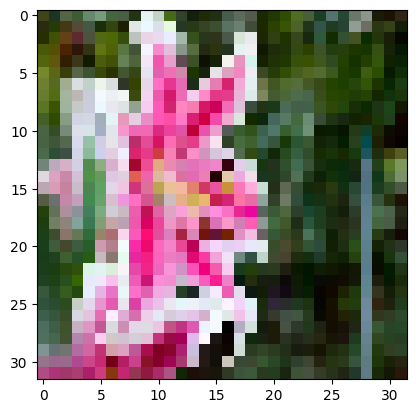

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Actual label:  Lily
Predicted label:  Rose


In [95]:
perform_test(conv_model_with_dropout,test_data_gen)

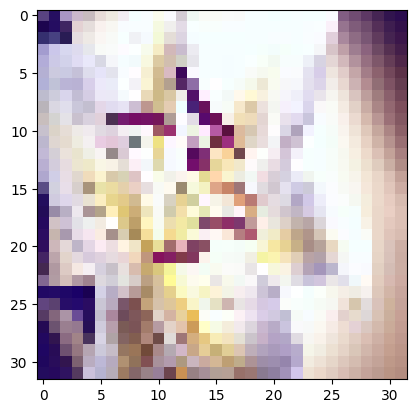

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Actual label:  Lily
Predicted label:  Daisy


In [96]:
perform_test(conv_model_with_dropout,test_data_gen)

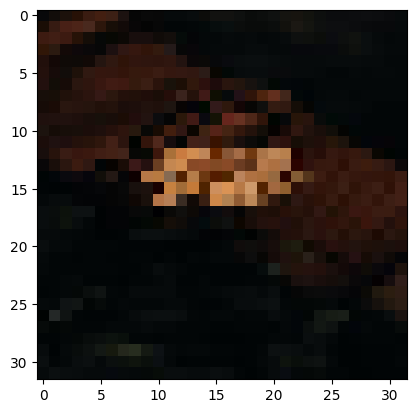

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Actual label:  Daisy
Predicted label:  Daisy


In [97]:
perform_test(conv_model_with_dropout,test_data_gen)